# Auditory Phonetics
Based on Ch. 4 of Johnson, Keith. (2012). _Acoustic and Auditory Phonetics_. 3rd Ed. [Wiley-Blackwell](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781444343083).

The study of speech sound perception

---

## Programming Environment

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

---

## Summary of formulae

$
\begin{aligned}
\text{dB SPL}
=20\log_{10}\left(\frac{x}{20\,\text{μPa}}\right)
\end{aligned}
$
where $x\gt0$

$
\text{sone}=2^{\frac{\text{dB}-40}{10}}
$
where $\text{dB}\ge40$

$
\begin{aligned}
\text{bark}=6\sinh^{-1}\left(\frac{f}{600}\right)
\end{aligned}
$

In [5]:
def dBSPL (x : float) -> float:
  assert x > 0, 'x > 0'
  dB = 20*np.log10(x/20)
  return dB

def sone (dB : float) -> float:
  assert dB >= 40, 'dB >= 40'
  sone = 2**((dB-40)/10)
  return sone

def bark (freq : float) -> float:
  bark = 6*np.arcsinh(freq/600)
  return bark

---

## Basic Audition

Human auditory system, low-fidelity
* amplitude is compressed
* frequency is warped
* adjacent sounds may blend into one another

listeners perceive auditory objects (mental), not acoustic objects (physical)

Peripheral Auditory System
* the part of the auditory system that is not in the brain
* translates acoustic signals into neural signals
* performs amplitude compression and a kind of Fourier analysis of the signal

anatomy of the PAS
* ear, outer
  * ear canal
  * ear drum
* ear, middle
  * incus
  * malleus
  * stapes
* ear, inner
  * auditory nerve
  * basilar membrane
  * cochlea

the basilar membrane is thinner at the beginning and thicker at the end

the thin end responds to high-frequency components in the acoustic signal

the thick end responds to low-frequency components in the acoustic signal

---

## Perceived Loudness

the most physically violent sounds are on the order of 10^7 (ten million) times more violent than the least violent sounds

the loudest sounds are on the order of 10^3 (one thousand) times louder than the quietist sounds

Typical Experience | Absolute Air Pressure Fluctuations [μPa] | Acoustic Intensity [dB SPL] | Perceived Loudness [sones]
-|-|-|-
absolute threshold | $2\times10$ | $0.0\times10^2$ |
faint whisper | $2\times10^2$ | $0.2\times10^2$ |
quiet office | $2\times10^3$ | $0.4\times10^2$ | $2^0$
conversation | $2\times10^4$ | $0.6\times10^2$ | $2^2$
city bus | $2\times10^5$ | $0.8\times10^2$ | $2^4$
subway train | $2\times10^6$ | $1.0\times10^2$ | $2^6$
loud thunder | $2\times10^7$ | $1.2\times10^2$ | $2^8$
pain and damage | $2\times10^8$ | $1.4\times10^2$ | $2^{10}$
RANGE | $10^7$ | $\sim10^2$ | $2^{10}\approx10^3$
TIMES GREATER PER STEP | $10$ | | $2^2$

---

## Decibel Scale

Expressing the amplitude of a sound wave
* acoustic energy as pressure
* electrical energy as voltage

The decibel scale is a way of expressing sound amplitude that is better correlated with perceived loudness.

The decibel scale provides an approximation to the nonlinearity of human loudness sensation.

The relative loudness of a sound is measured in terms of acoustic/sound intensity.

Acoustic/sound intensity is proportional to the square of the amplitude on a logarithmic scale.

Acoustic intensity is the amount of acoustic power exerted by the sound wave's pressure fluctuation per unit of area $[\text{W cm}^{-2}]$

---

Consider a sound with average pressure amplitude $x$.

The intensity of $x$ relative to a reference sound with pressure amplitude $r$ is the power ratio

$
\begin{aligned}
\frac{x^2}{r^2}
=\left(\frac{x}{r}\right)^2
\end{aligned}
$

A bel is the base 10 logarithm of this power ratio.

$
\begin{aligned}
\text{B}=\log_{10}\left(\frac{x}{r}\right)^2
\end{aligned}
$
where
$
\begin{aligned}
\frac{x}{r}\gt0
\end{aligned}
$

The unit of loudness, the bel, is larger than desired.

A decibel is one-tenth of a bel.

$
\begin{aligned}
\text{dB}
=10\log_{10}\left(\frac{x}{r}\right)^2
=20\log_{10}\left(\frac{x}{r}\right)
\end{aligned}
$
where
$
\begin{aligned}
\frac{x}{r}\gt0
\end{aligned}
$

There are two common choices for the reference level $r$ used in dB measurements.

1

20 μPa is the typical absolute threshold (i.e., lowest audible pressure fluctuation) of a 1 kHz tone.

When this reference value is used the units are dB SPL (sound pressure level).

$
\begin{aligned}
\text{dB SPL}
=20\log_{10}\left(\frac{x}{20\,\text{μPa}}\right)
\end{aligned}
$
where $x\gt0$

2

Rather than use the absolute threshold for a 1 kHz tone as the reference for all frequencies, the loudness of a tone is measured relative to the typical absolute threshold level for a tone at that frequency.

When this approach is employed the units are dB SL (sensation level).

In speech analysis programs amplitude may be expressed in dB relative to
* the largest value that can be taken by a sample in the digital speech waveform, in which case the amplitude values are negative numbers.
* the smallest value that can be taken by a sample in the digital speech waveform, in which case the amplitude values are positive numbers.

These reference levels are used when one does not need to know the absolute dB SPL value of the signal.

---

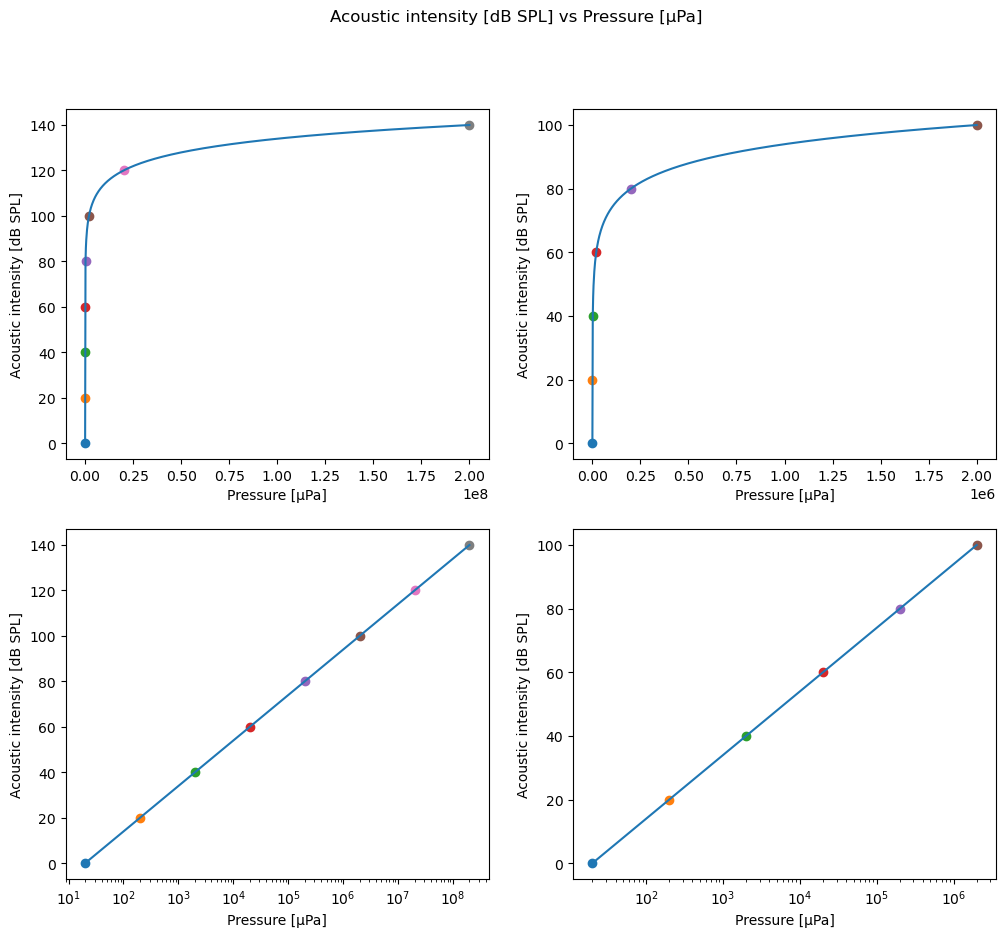

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,10));

x=np.linspace(2e1,2e8,1001)
y=20*np.log10(x/20)
ax1.plot(x,y);

for x,y in zip([2e1,2e2,2e3,2e4,2e5,2e6,2e7,2e8],
               [0.0e2,0.2e2,0.4e2,0.6e2,0.8e2,1.0e2,1.2e2,1.4e2]):
  ax1.scatter(x,y);

ax1.set_xlabel('Pressure [μPa]');
ax1.set_ylabel('Acoustic intensity [dB SPL]');
#ax1.set_title('Acoustic intensity [dB SPL] vs Pressure [μPa]');

x=np.linspace(2e1,2e6,1001)
y=20*np.log10(x/20)
ax2.plot(x,y);

for x,y in zip([2e1,2e2,2e3,2e4,2e5,2e6],
               [0.0e2,0.2e2,0.4e2,0.6e2,0.8e2,1.0e2]):
  ax2.scatter(x,y);

ax2.set_xlabel('Pressure [μPa]');
ax2.set_ylabel('Acoustic intensity [dB SPL]');
#ax2.set_title('Acoustic intensity [dB SPL] vs Pressure [μPa]');

x=np.linspace(2e1,2e8,1001)
y=20*np.log10(x/20)
ax3.plot(x,y);

for x,y in zip([2e1,2e2,2e3,2e4,2e5,2e6,2e7,2e8],
               [0.0e2,0.2e2,0.4e2,0.6e2,0.8e2,1.0e2,1.2e2,1.4e2]):
  ax3.scatter(x,y);

ax3.set_xlabel('Pressure [μPa]');
ax3.set_xscale('log');
ax3.set_ylabel('Acoustic intensity [dB SPL]');
#ax3.set_title('Acoustic intensity [dB SPL] vs Pressure [μPa]');

x=np.linspace(2e1,2e6,1001)
y=20*np.log10(x/20)
ax4.plot(x,y);

for x,y in zip([2e1,2e2,2e3,2e4,2e5,2e6],
               [0.0e2,0.2e2,0.4e2,0.6e2,0.8e2,1.0e2]):
  ax4.scatter(x,y);

ax4.set_xlabel('Pressure [μPa]');
ax4.set_xscale('log');
ax4.set_ylabel('Acoustic intensity [dB SPL]');
#ax4.set_title('Acoustic intensity [dB SPL] vs Pressure [μPa]');

fig.suptitle('Acoustic intensity [dB SPL] vs Pressure [μPa]');

---

## Sone Scale

$
\begin{aligned}
\text{sone}=2^{\frac{\text{dB}-40}{10}}
\end{aligned}
$
where $\text{dB}\ge40$

The sone scale shows listeners' judgments of relative loudness scaled so that
* a sound about as loud as a quiet office ($2\times10^3$ μPa) is unity
* a sound that is subjectively half as loud as that has a value of one half
* a sound that is subjectively twice as loud as that has a value double that

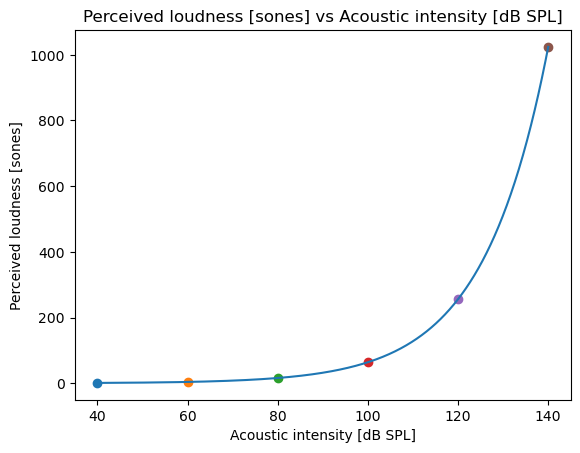

In [28]:
x=np.linspace(40,140,1001)
y=2**((x-40)/10)
plt.plot(x,y);

for x,y in zip([0.4e2,0.6e2,0.8e2,1.0e2,1.2e2,1.4e2],
               [2**0,2**2,2**4,2**6,2**8,2**10]):
  plt.scatter(x,y);

plt.xlabel('Acoustic intensity [dB SPL]');
plt.ylabel('Perceived loudness [sones]');
plt.title('Perceived loudness [sones] vs Acoustic intensity [dB SPL]');

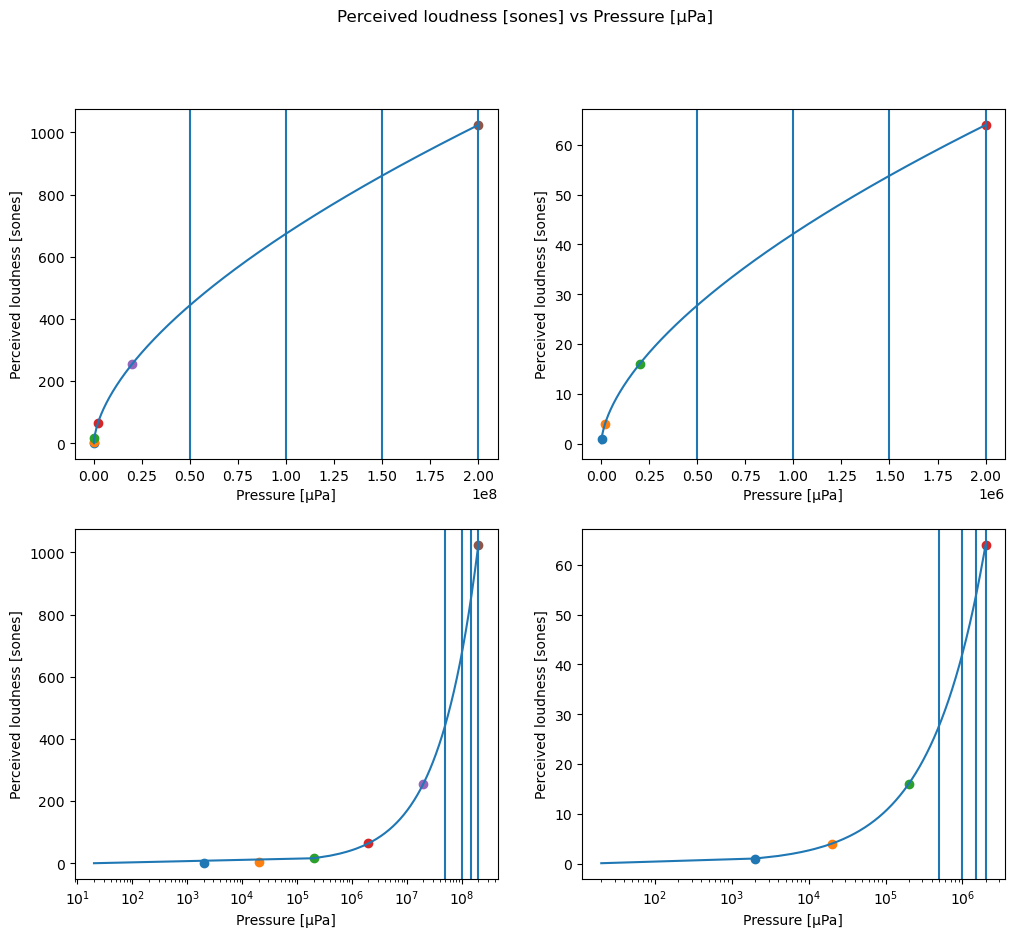

In [44]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,10))

x=np.linspace(2e1,2e8,1001)
y=20*np.log10(x/20)
y=2**((y-40)/10)
ax1.plot(x,y);

for x,y in zip([2e3,2e4,2e5,2e6,2e7,2e8],
               [2**0,2**2,2**4,2**6,2**8,2**10]):
  ax1.scatter(x,y);

ax1.set_xlabel('Pressure [μPa]');
ax1.set_ylabel('Perceived loudness [sones]');
#ax1.set_title('Perceived loudness [sones] vs Pressure [μPa]');
ax1.axvline(0.25*2e8);
ax1.axvline(0.50*2e8);
ax1.axvline(0.75*2e8);
ax1.axvline(1.00*2e8);

x=np.linspace(2e1,2e6,1001)
y=20*np.log10(x/20)
y=2**((y-40)/10)
ax2.plot(x,y);

for x,y in zip([2e3,2e4,2e5,2e6],
               [2**0,2**2,2**4,2**6]):
  ax2.scatter(x,y);

ax2.set_xlabel('Pressure [μPa]');
ax2.set_ylabel('Perceived loudness [sones]');
#ax2.set_title('Perceived loudness [sones] vs Pressure [μPa]');
ax2.axvline(0.25*2e6);
ax2.axvline(0.50*2e6);
ax2.axvline(0.75*2e6);
ax2.axvline(1.00*2e6);

x=np.linspace(2e1,2e8,1001)
y=20*np.log10(x/20)
y=2**((y-40)/10)
ax3.plot(x,y);

for x,y in zip([2e3,2e4,2e5,2e6,2e7,2e8],
               [2**0,2**2,2**4,2**6,2**8,2**10]):
  ax3.scatter(x,y);

ax3.set_xlabel('Pressure [μPa]');
ax3.set_xscale('log');
ax3.set_ylabel('Perceived loudness [sones]');
#ax3.set_title('Perceived loudness [sones] vs Pressure [μPa]');
ax3.axvline(0.25*2e8);
ax3.axvline(0.50*2e8);
ax3.axvline(0.75*2e8);
ax3.axvline(1.00*2e8);

x=np.linspace(2e1,2e6,1001)
y=20*np.log10(x/20)
y=2**((y-40)/10)
ax4.plot(x,y);

for x,y in zip([2e3,2e4,2e5,2e6],
               [2**0,2**2,2**4,2**6]):
  ax4.scatter(x,y);

ax4.set_xlabel('Pressure [μPa]');
ax4.set_xscale('log');
ax4.set_ylabel('Perceived loudness [sones]');
#ax2.set_title('Perceived loudness [sones] vs Pressure [μPa]');
ax4.axvline(0.25*2e6);
ax4.axvline(0.50*2e6);
ax4.axvline(0.75*2e6);
ax4.axvline(1.00*2e6);

fig.suptitle('Perceived loudness [sones] vs Pressure [μPa]');

This graph shows that
* for soft sounds, small changes in pressure result in large changes in perceived loudness
* for loud sounds, large changes in pressure result in small changes in perceived loudness

At $10^5$ μPa, how does the perceived loudness change when the sound pressure is increased by $10^5$ μPa?

The perceived loudness increases by about 50%.

In [77]:
print(sone(dBSPL(1e5)))
print(sone(dBSPL(2e5)))
print(sone(dBSPL(2e5))-sone(dBSPL(1e5)))
print(sone(dBSPL(2e5))/sone(dBSPL(1e5)))

10.54100128020249
16.0
5.45899871979751
1.5178823694908652


At $2\times10^6$ μPa, how does the perceived loudness change when the sound pressure is increased by $10^5$ μPa?

The perceived loudness increases by about 3%.

In [79]:
print(sone(dBSPL(2e6)))
print(sone(dBSPL(2e6+1e5)))
print(sone(dBSPL(2e6+1e5))-sone(dBSPL(2e6)))
print(sone(dBSPL(2e6+1e5))/sone(dBSPL(2e6)))

64.0
65.90785888988565
1.9078588898856452
1.0298102951544632


---

Perceived loudness varies as a function of frequency.

The human auditory system is most sensitive to sounds that have frequencies between 2 and 5 kHz.

Sensitivity falls quickly above 10 kHz.

---

## Bark Scale

The auditory system (namely, the basilar membrane of the cochlea) performs a Fourier analysis of incoming sounds.

However, the auditory system's frequency response is not linear.

The bark scale is proportional to a scale of perceived pitch called the Mel scale and to distance along the basilar membrane.

$
\begin{aligned}
\text{bark}=6\sinh^{-1}\left(\frac{f}{600}\right)
\end{aligned}
$

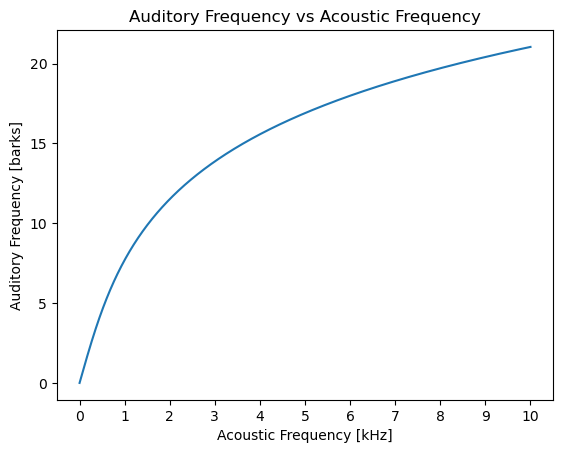

In [37]:
x=np.linspace(1,1e4,1001)
vbark=np.vectorize(bark)
y=vbark(x)

plt.plot(x,y);
plt.xlabel('Acoustic Frequency [kHz]');
plt.xticks(ticks=[int(n*1e4) for n in np.arange(0,1.1,0.1)],labels=range(0,11));
plt.ylabel('Auditory Frequency [barks]');
plt.title('Auditory Frequency vs Acoustic Frequency');

This graph shows that the auditory system is more sensitive to changes in acoustic frequency at the low end of the audible frequency range than at the high end.

At 0.5 kHz, how does the auditory frequency change when the acoustic frequency increases by 0.5 kHz?

The auditory frequency increases by about 70%.

In [43]:
print(bark(0.5e3))
print(bark(1.0e3))
print(bark(1.0e3)-bark(0.5e3))
print(bark(1.0e3)/bark(0.5e3))

4.550916823162454
7.702773976459156
3.151857153296702
1.692576304021848


At 5 kHz, how does the auditory frequency change when the acoustic frequency increases by 0.5 kHz?

The auditory frequency increases by about 3%.

In [44]:
print(bark(5.0e3))
print(bark(5.5e3))
print(bark(5.5e3)-bark(5.0e3))
print(bark(5.5e3)/bark(5.0e3))

16.901948584952663
17.470097475009343
0.5681488900566798
1.033614401747884


---

## Figures

* [[W](https://en.wikipedia.org/wiki/Alexander_Graham_Bell)] Bell, Alexander Graham (1847-1922)
* [[W](https://en.wikipedia.org/wiki/Harvey_Fletcher)] Fletcher, Harvey (1884-1981)

---

## Terms

* [[W](https://en.wikipedia.org/wiki/Absolute_threshold_of_hearing)] Absolute Threshold of Hearing
* [[W](https://en.wikipedia.org/wiki/Acoustical_engineering)] Acoustic Engineering
* [[W](https://en.wikipedia.org/wiki/Acoustic_impedance)] Acoustic Impedance
* [[W](https://en.wikipedia.org/wiki/Sound_intensity)] Acoustic Intensity (Sound Intensity)
* [[W](https://en.wikipedia.org/wiki/Sound_power)] Acoustic Power (Sound Power)
* [[W](https://en.wikipedia.org/wiki/Sound_pressure)] Acoustic Pressure (Sound Pressure)
* [[W](https://en.wikipedia.org/wiki/Acoustics)] Acoustics
* [[W](https://en.wikipedia.org/wiki/Anechoic_chamber)] Anechoic Chamber
* [[W](https://en.wikipedia.org/wiki/Audiogram)] Audiogram
* [W] Auditory Model
* [[W](https://en.wikipedia.org/wiki/Auditory_phonetics)] Auditory Phonetics
* [W] Auditory Spectrogram (Cochleagram)
* [W] Auditory Spectrum
* [[W](https://en.wikipedia.org/wiki/Auditory_system)] Auditory System
* [[W](https://en.wikipedia.org/wiki/Bark_scale)] Bark Scale
* [[W](https://en.wikipedia.org/wiki/Decibel)] Bel
* [[W](https://en.wikipedia.org/wiki/Cent_(music))] Cent
* [[W](https://en.wikipedia.org/wiki/Cochlea)] Cochlea
* [W] Cochleagram (Auditory Spectrogram)
* [[W](https://en.wikipedia.org/wiki/Computational_auditory_scene_analysis)] Computational Auditory Scene Analysis
* [[W](https://en.wikipedia.org/wiki/Correlogram)] Correlogram
* [[W](https://en.wikipedia.org/wiki/Decibel)] Decibel
* [[W](https://en.wikipedia.org/wiki/Ear)] Ear
* [[W](https://en.wikipedia.org/wiki/Natural_frequency)] Eigenfrequency (Natural Frequency)
* [[W](https://en.wikipedia.org/wiki/Equal-loudness_contour)] Equal-Loudness Contour
* [[W](https://en.wikipedia.org/wiki/Frequency_response)] Frequency Response
* [[W](https://en.wikipedia.org/wiki/Hearing_level)] Hearing Level
* [[W](https://en.wikipedia.org/wiki/Hearing_range)] Hearing Range
* [[W](https://en.wikipedia.org/wiki/Incus)] Incus
* [[W](https://en.wikipedia.org/wiki/Inner_ear)] Inner Ear
* [[W](https://en.wikipedia.org/wiki/Logarithmic_scale)] Logarithmic Scale
* [[W](https://en.wikipedia.org/wiki/Loudness)] Loudness
* [[W](https://en.wikipedia.org/wiki/Loudness_compensation)] Loudness Compensation
* [[W](https://en.wikipedia.org/wiki/Malleus)] Malleus
* [[W](https://en.wikipedia.org/wiki/Mel_scale)] Mel Scale
* [[W](https://en.wikipedia.org/wiki/Multidimensional_scaling)] Multidimensional Scaling (MDS)
* [[W](https://en.wikipedia.org/wiki/Natural_frequency)] Natural Frequency (Eigenfrequency)
* [[W](https://en.wikipedia.org/wiki/Neper)] Neper
* [[W](https://en.wikipedia.org/wiki/Normal_mode)] Normal Mode
* [[W](https://en.wikipedia.org/wiki/Ossicles)] Ossicles
* [[W](https://en.wikipedia.org/wiki/Outer_ear)] Outer Ear
* [[W](https://en.wikipedia.org/wiki/Pascal_(unit))] Pascal
* [[W](https://en.wikipedia.org/wiki/Perilymph)] Perilymph
* [W] Peripheral Auditory System
* [[W](https://en.wikipedia.org/wiki/Phon)] Phon
* [[W](https://en.wikipedia.org/wiki/Pitch_(music))] Pitch
* [[W](https://en.wikipedia.org/wiki/Psychoacoustics)] Psychoacoustics
* [[W](https://en.wikipedia.org/wiki/Psychophysics)] Psychophysics
* [[W](https://en.wikipedia.org/wiki/Resonance)] Resonance
* [[W](https://en.wikipedia.org/wiki/Root_mean_square)] Root Mean Square
* [[W](https://en.wikipedia.org/wiki/Sone)] Sone
* [[W](https://en.wikipedia.org/wiki/Sound)] Sound
* [[W](https://en.wikipedia.org/wiki/Sound_energy)] Sound Energy
* [[W](https://en.wikipedia.org/wiki/Sound_energy_density)] Sound Energy Density
* [[W](https://en.wikipedia.org/wiki/Sound_intensity)] Sound Intensity (Acoustic Intensity)
* [[W](https://en.wikipedia.org/wiki/Sound_power)] Sound Power (Acoustic Power)
* [[W](https://en.wikipedia.org/wiki/Sound_pressure)] Sound Pressure (Acoustic Pressure)
* [[W](https://en.wikipedia.org/wiki/Speed_of_sound)] Speed of Sound
* [[W](https://en.wikipedia.org/wiki/Stapes)] Stapes
* [[W](https://en.wikipedia.org/wiki/Threshold_of_pain)] Threshold of Pain
* [[W](https://en.wikipedia.org/wiki/Voice_onset_time)] Voice Onset Time (VOT)

---

## Bibliography

Johnson, Keith. (2012). _Acoustic and Auditory Phonetics_. 3rd Ed. [Wiley-Blackwell](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781444343083).

---